# Detección de anomalías para identificar transacciones fraudulentas con tarjetas de crédito

---
### Integrantes:
* Juan Fernando Gallego
* Juan Esteban Chavarría
* Karla Orozco
* Jonathan Stiven Zapata


## <h1 style="text-align: center">1. Introducción</h1><a id = "1" ></a>

Cuando hacemos cualquier transacción al comprar productos en línea una buena cantidad de personas prefieren las tarjetas de crédito. El límite de crédito de las tarjetas de crédito a veces nos ayuda a hacer compras incluso si no tenemos la cantidad en ese momento. Pero, por otro lado, estas características son mal utilizadas por los atacantes cibernéticos.

Cuando hablamos de seguridad en la vida digital, el principal reto es encontrar la actividad anormal.

Anomalía es un sinónimo de la palabra "outlier". La detección de anomalías (o detección de valores atípicos) es la identificación de elementos, eventos u observaciones poco comunes que levantan sospechas por diferir significativamente de la mayoría de los datos. Las actividades anómalas pueden estar relacionadas con algún tipo de problema o suceso raro, como fraudes bancarios, problemas médicos, defectos estructurales, equipos que funcionan mal, etc.

Para hacer frente a este problema necesitamos un sistema que pueda abortar la transacción si la encuentra sospechosa. Aquí viene la necesidad de un sistema que pueda rastrear el patrón de todas las transacciones y si cualquier patrón es anormal entonces la transacción debe ser abortada.

Hoy en día, tenemos muchos algoritmos de aprendizaje automático que pueden ayudarnos a clasificar las transacciones anormales. El único requisito son los datos pasados y el algoritmo adecuado que pueda ajustarse a nuestros datos de la mejor manera.

Existen diversos métodos de aprendizaje tanto en el campo supervisado como no supervisado. Aquí, sin embargo, vamos a discutir cómo el aprendizaje no supervisado se utiliza para para encontrar outliers y también entender por qué la detección de anomalías utilizando el aprendizaje no supervisado es beneficioso en la mayoría de los casos.

En este ejercicio se planteará la solución al problema en cuestión mediante la aplicación de dos algoritmos de clasificación no supervisada los cuales serán comparados con el fin de decidir cuál de estos representa una solución mas adecuada el problema planteado. En este caso se trabajará con el algoritmo ForestsIsolation y Local Outlier Factor.

Finalmente, se obtendrá el mejor modelo que pueda clasificar la transacción en tipos normales y anormales.



Isolation Forests:

Es un algoritmo de detección de anomalías. Detecta las anomalías utilizando el concepto de aislamiento (la distancia de un punto de datos al resto de los datos), en lugar de modelar los puntos normales.

Este algoritmo utiliza las dos propiedades de las anomalías ("Pocas" y "Diferentes") para detectar su existencia. Como las anomalías son pocas y diferentes, son más susceptibles de ser aisladas. Este algoritmo aisla cada punto de los datos y los divide en valores atípicos o normales. Esta división depende del tiempo que se tarde en separar los puntos. Si intentamos separar un punto que obviamente no es un outlier, tendrá muchos puntos en su ronda, por lo que será realmente difícil de aislar. En cambio, si el punto es un outlier, estará solo y lo encontraremos muy fácilmente.

Isolation forest introduce un método diferente que aisla explícitamente las anomalías utilizando árboles binarios, demostrando una nueva manera de detectar anomalías más rápido que se dirige directamente a las anomalías sin perfilar todas las instancias normales. El algoritmo funciona bien con un gran volumen de datos.

Ventajas:

* Tiene una complejidad temporal lineal baja y un requisito de memoria pequeño
* Es capaz de tratar con datos de alta dimensión con atributos irrelevantes
* Puede ser entrenado con o sin anomalías en el conjunto de entrenamiento
* Puede proporcionar resultados de detección con diferentes niveles de granularidad sin necesidad de reentrenamiento


Local Outlier Factor:

Es un método de detección de anomalías no supervisado que calcula la desviación de la densidad local de un punto de datos determinado con respecto a sus vecinos. Se trata de un cálculo que mira a los vecinos de un determinado punto para averiguar su densidad y compararla con la densidad de los puntos vecinos más adelante. En resumen, podemos decir que la densidad alrededor de un objeto atípico es significativamente diferente de la densidad alrededor de sus vecinos. LOF considera como valores atípicos las muestras que tienen una densidad sustancialmente inferior a la de sus vecinos.
Una de las grandes desventajas de este algoritmo es que sólo observa la vecindad local de un punto de datos y, por tanto, no puede hacer predicciones sobre puntos de datos fuera de la muestra. Por eso aquí trabajamos directamente con el conjunto de datos de X_test.

In [1]:
# Data handling libraries:
import pandas as pd
import numpy as np

# Data visualization libraries:
import matplotlib.pyplot as plt
# We setup matplotlib to show the plots inline:
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
import seaborn as sns

# Ml libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score

<Figure size 432x216 with 0 Axes>

<h1 style="text-align: center">2. Dataset</h1><a id = "2" ></a>
El dataset contiene transacciones bancarias reales realizadas europeos en septiembre de 2013. Presenta transacciones ocurridas en dos días, donde tenemos 492 fraudes de 284.807 transacciones. La clase positiva (fraudes) representa el 0,172% de todas las transacciones.

Por motivos de seguridad, no se compartieron las variables reales, sino que disponemos de versiones transformadas de estas (Componentes principales - PCA), una de las ventajas que tenemos con PCA es que los vectores de componentes son independientes entre sí. Como resultado, podemos encontrar 29 variables predictoras y 1 columna de clase final.

Las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Importe'. La característica "Tiempo" contiene los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos. La característica "Importe" es el importe de la transacción; esta característica puede utilizarse para el aprendizaje sensible al costo en función de la muestra. La característica "Clase" es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

In [37]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Separamos los datos en dos variables: Transacciones que son normales vs las que son fraudulentas:
normal = df[df.Class == 0]
fraudulent = df[df.Class == 1]

<h1 style="text-align: center">3. Ingeniería de características</h1><a id = "3" ></a>

Todos conocemos la importancia de unas buenas características para los modelos de aprendizaje automático. En la tarea de aprendizaje automático tenemos características que necesitamos procesar para hacerlas buenas y esto se hace mediante tareas de preprocesamiento de datos.

Comprobemos la distribución de las transacciones:

In [4]:
total_transactions = len(df)
normal_count = len(normal)
fraudulent_count = len(fraudulent)
fraud_percentage = round(fraudulent_count/normal_count*100, 2)
print('Total de transacciones: {}'.format(total_transactions))
print('Cantidad de transacciones normales: {}'.format(normal_count))
print('Numero de transacciones fraudulentas: {}'.format(fraudulent_count))
print('Porcentaje de transacciones fraudulentas: {}'.format(fraud_percentage))

Total de transacciones: 284807
Cantidad de transacciones normales: 284315
Numero de transacciones fraudulentas: 492
Porcentaje de transacciones fraudulentas: 0.17


/Users/jonny/Documents/Maestria/2022_2-2semestre/AprendizajeAutomatico/master-datos-ml-kjjj/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


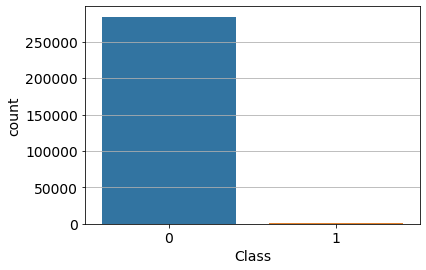

0    284315
1       492
Name: Class, dtype: int64


In [5]:
sns.countplot(df.Class)
plt.show()
print(df.Class.value_counts())

Lo principal que se puede observar en estos datos es que el conjunto de datos está desbalanceado (Sólo el 0,17% de las transacciones son fraudulentas).
Teniendo en cuenta la proporción de desequilibrio de las clases, no se puede usar como criterio de exactitud los resultados que arroje una matriz de confusión ya que no es significativa para la clasificación desbalanceada. En vez de eso usamos como criterio de exactitud la medición del Área Bajo la Curva de Precisión-Recuperación (Area Under the Precision-Recall Curve - AUPRC).

Ahora miremos si hay necesidad de hacer remuestreo verificando valores nulos:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Según el recuento por columna, no tenemos valores nulos. Además, la selección de características no es el caso para este uso. De todos modos más adelante vamos a aplicar un mecanismo de selección de características para comprobar si los resultados se optimizan.

La variable tiempo contiene los segundos transcurridos entre cada transacción y la primera transacción del dataset. Vamos a transformar esta característica en horas para tener una mejor comprensión:

/Users/jonny/Documents/Maestria/2022_2-2semestre/AprendizajeAutomatico/master-datos-ml-kjjj/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jonny/Documents/Maestria/2022_2-2semestre/AprendizajeAutomatico/master-datos-ml-kjjj/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


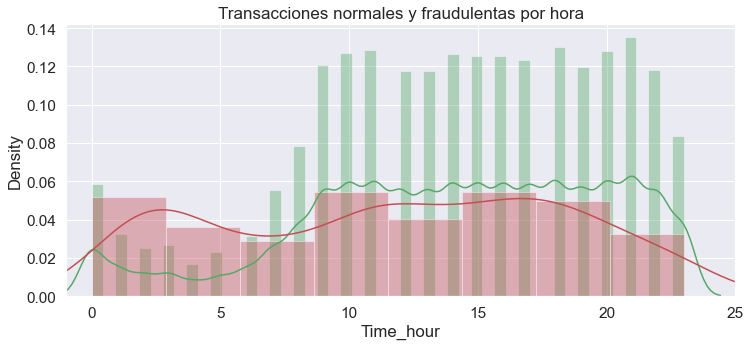

In [40]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

df['Time_hour'].head()

plt.figure(figsize=(12,5))
sns.distplot(df[df.Class == 0]["Time_hour"], color='g')
sns.distplot(df[df.Class == 1]["Time_hour"], color='r')
plt.title('Transacciones normales y fraudulentas por hora', fontsize=17)
plt.xlim([-1,25])
plt.show()

In [ ]:
df.drop(['Time_hour'], axis=1, inplace=True)

Se observó que en los datos hay 28 características que son versiones transformadas de PCA, pero el Monto es el original. Y al comprobar el mínimo y el máximo se encontró que la diferencia es enorme, lo cual puede desviar el resultado:

In [7]:
min(df.Amount), max(df.Amount)

(0.0, 25691.16)

En este caso es buena práctica escalar esta variable. Podemos utilizar un escalador estándar para normalizarla:

In [8]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

# Selección de características usando pruebas de hipótesis:
## Z-test:

Vamos a realizar una prueba de hipótesis para encontrar/descartar columnas que no sean estadísticamente significativas, si se da el caso. Realizaremos la prueba Z con las transacciones válidas como población.

El caso es que tenemos que encontrar si los valores de las transacciones fraudulentas son significativamente diferentes de las transacciones normales o no para todas las características. El nivel de significancia es 0,01 y es una prueba de dos colas, por lo que tenemos un valor crítico de 2.58, el cual fue calculado de la siguiente manera:

v.c = 0.5 - 0.995  = |-0.495|. Al buscar este valor en la tabla de la prueba Z obtenemos el valor de 2.58

## Planteamiento de escenario:

Transacciones válidas como nuestra población

Transacciones fraudulentas como muestra

Prueba Z de dos colas

Nivel de significancia de 0,01

El valor crítico correspondiente es 2,58

**Hipótesis:**

H0: No hay diferencia (no significativa)

H1: Existe una diferencia (significativa)

Formula para el z-score:

**𝑍𝑠𝑐𝑜𝑟𝑒=(𝑥¯−𝜇)/𝑆.𝐸**

In [9]:
def ztest(feature):
    mean = normal[feature].mean()
    std = fraudulent[feature].std()
    zScore = (fraudulent[feature].mean() - mean) / (std/np.sqrt(fraudulent_count))
    return zScore

In [10]:
columns = df.drop('Class', axis=1).columns
significant_features=[]
critical_value=2.58

for i in columns:
    z_vavlue=ztest(i)
    if (abs(z_vavlue) >= critical_value):
        print(i," es estadisticamente significativo") # Rechaza la hipotesis nula
        significant_features.append(i)

Time  es estadisticamente significativo
V1  es estadisticamente significativo
V2  es estadisticamente significativo
V3  es estadisticamente significativo
V4  es estadisticamente significativo
V5  es estadisticamente significativo
V6  es estadisticamente significativo
V7  es estadisticamente significativo
V9  es estadisticamente significativo
V10  es estadisticamente significativo
V11  es estadisticamente significativo
V12  es estadisticamente significativo
V14  es estadisticamente significativo
V16  es estadisticamente significativo
V17  es estadisticamente significativo
V18  es estadisticamente significativo
V19  es estadisticamente significativo
V20  es estadisticamente significativo
V21  es estadisticamente significativo
V24  es estadisticamente significativo
V27  es estadisticamente significativo
V28  es estadisticamente significativo
Amount  es estadisticamente significativo


Tenemos una variable más que es el tiempo, que puede ser un factor decisivo externo, pero en nuestro proceso de modelación, podemos dejarla de lado.

In [11]:
df.drop(['Time'], axis=1, inplace=True)

También podemos comprobar si hay transacciones duplicadas. Antes de eliminar cualquier transacción duplicada, tenemos 284807 transacciones en nuestros datos. Vamos a eliminar el duplicado y observar los cambios:

In [12]:
df.shape

(284807, 30)

In [13]:
df.drop_duplicates(inplace=True)


Comprobemos de nuevo el recuento:

In [14]:
df.shape

(275663, 30)

Estábamos teniendo alrededor de 9000 transacciones duplicadas.
Ahora tenemos los datos bien escalados, sin duplicados ni faltantes. Podemos proceder a separar los conjuntos para entrenamiento y pruebas para construir nuestro modelo.

<h1 style="text-align: center">4. Preparación de datos para los modelos</h1><a id = "4" ></a>


In [15]:
y_true = df['Class']
df_X = df.drop('Class', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(df_X, y_true, test_size=0.3, random_state=0)

<h1 style="text-align: center">5. Entrenamiento y evaluación de los modelos</h1><a id = "5" ></a>

Las funciones de entrenamiento y predicción que se muestran a continuación están diseñadas para crear modelos ensamblados (con la técnica de bagging), con un tamaño por defecto de 5 modelos. El Isolation Forest utiliza estas funciones:

In [16]:
def train(X, clf, ensemble_size = 5 , sampleSize = 10000):
    model_list = []
    for n in range(ensemble_size):
        X = df_X.sample(sampleSize)
        clf.fit(X)
        model_list.append(clf)
    return model_list

In [17]:
def predict(X, model_list):
    y_pred=np.zeros(X.shape[0])
    for clf in model_list:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(model_list)
    return y_pred

# Isolation Forest:

In [18]:
# Aquí el ajuste de parámetros no hace parte del alcance por lo que se toman los recomendados en base a la lectura y la biblioteca de scikit-learn:
alg = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.01,
  max_features = 1.0, bootstrap = False, n_jobs = -1, random_state = 0, verbose = 0)

In [19]:
if_mdlLst = train(X_train, alg)

/Users/jonny/Documents/Maestria/2022_2-2semestre/AprendizajeAutomatico/master-datos-ml-kjjj/.venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/jonny/Documents/Maestria/2022_2-2semestre/AprendizajeAutomatico/master-datos-ml-kjjj/.venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/jonny/Documents/Maestria/2022_2-2semestre/AprendizajeAutomatico/master-datos-ml-kjjj/.venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Users/jonny/Documents/Maestria/2022_2-2semestre/AprendizajeAutomatico/master-datos-ml-kjjj/.venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Isolati

In [20]:
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

# Creación de la función de decisión que va a permitir determinar los nombre de las etiquetas:
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

Analicemos la precisión del modelos:

Finalmente, vamos a utilizar algunas bibliotecas de calificación de modelos. Dado que estamos tratando con un conjunto de datos muy desequilibrado, la puntuación F1 se utiliza como un indicador del rendimiento del modelo así como el indicador Roc_auc.

Para más detalles, consular la documentación en http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html y en https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [21]:
roc_auc_score(y_test, if_y_pred_class)

0.8734285421776371

In [22]:
f1_score(y_test, if_y_pred_class)

0.05102996254681648

Habíamos dicho que la matriz de confusión no era útil en estos casos sin embargo la usamos para hacer unas validaciones de que el modelo está clasificando bien aprovechando el hecho de que tenemos la variable "Y" predicha pero cabe aclarar que en general no es tomada en cuenta para las conclusiones

In [23]:
if_cm = confusion_matrix(y_test, if_y_pred_class)

<AxesSubplot:>

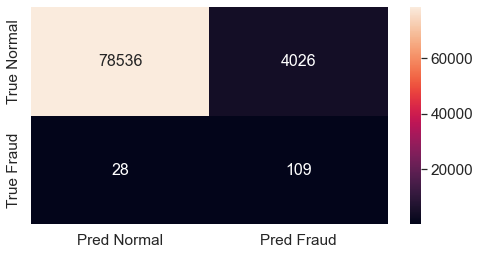

In [24]:
df_cm = pd.DataFrame(if_cm, ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

# LOF

In [25]:
# Al igual que el modelo anterior el ajuste de parámetros se deja para una investigación posterior. De momento usamos los recomendados por la biblioteca de scikit-learn:
clf = LocalOutlierFactor(n_neighbors = 20, algorithm = 'auto', leaf_size = 30,
  metric = 'minkowski', p = 2, metric_params = None, contamination = 0.1, n_jobs = -1)

In [26]:
clf.fit(X_test)

LocalOutlierFactor(contamination=0.1, n_jobs=-1)

In [27]:
clf.fit(X_test)

LocalOutlierFactor(contamination=0.1, n_jobs=-1)

In [28]:
lof_y_pred=clf.negative_outlier_factor_

#Creating class labels based on decision function
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

In [29]:
roc_auc_score(y_test, lof_y_pred_class)

0.47861390431291895

In [30]:
f1_score(y_test, lof_y_pred_class)

0.00046816479400749064

In [31]:
lof_cm=confusion_matrix(y_test, lof_y_pred_class)

<AxesSubplot:>

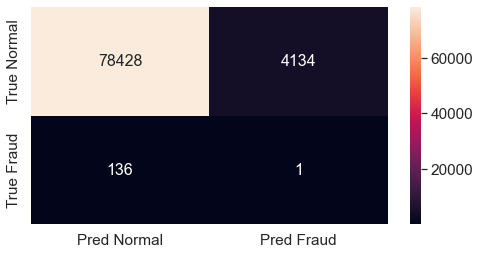

In [32]:
df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

<h1 style="text-align: center">6. Comparación de resultados</h1><a id = "6" ></a>

In [33]:
## Performance Plot
auc_scores={
    'Isolation Forest': roc_auc_score(y_test, if_y_pred_class),
    'LOF':roc_auc_score(y_test, lof_y_pred_class)
}

f1_scores={
    'Isolation Forest':f1_score(y_test, if_y_pred_class),
    'LOF':f1_score(y_test, lof_y_pred_class)
}

Text(0.5, 0, 'AUC Score')

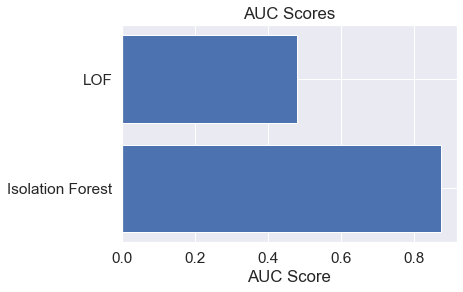

In [34]:
plt.title('AUC Scores')
plt.barh(range(len(auc_scores)), list(auc_scores.values()), align='center')
plt.yticks(range(len(auc_scores)), list(auc_scores.keys()))
plt.xlabel('AUC Score')

Text(0.5, 0, 'F1 Score')

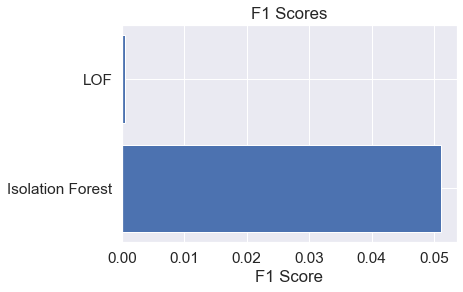

In [35]:
plt.title('F1 Scores')
plt.barh(range(len(f1_scores)), list(f1_scores.values()), align='center')
plt.yticks(range(len(f1_scores)), list(f1_scores.keys()))
plt.xlabel('F1 Score')

Conclusiones

En un escenario del mundo real, un modelo no supervisado se utiliza principalmente como semilla para crear datos etiquetados. A menos que se puedan formular reglas de riesgo basadas en el conocimiento del dominio para el problema, ahí si convendría más bien usar algoritmos tradicionales y métodos supervisados. En este caso se pudo analizar un set de datos sin tener mucho contexto del dominio, solo con el uso de herramientas de análisis de datos y aún así logramos una precisión mayor a la esperada (0.8734285421776371 para el caso del roc_auc y  0.05102996254681648 para el f1_score, tomando el Isolation Forest como el modelo que mejor clasifica)

Tanto Isolation Forest como Local Outlier Factor obtuvieron los mismos resultados en la predicción de casos normales, pero Isolation Forest obtuvo mejores resultados en la detección de casos de fraude.
En cuanto al rendimiento del modelo, comparando lasmétricas de rendimiento, el modelo de Isolation Forest es un claro ganador.

Las características de los datos son la versión transformada de PCA. Si las características actuales siguen un patrón similar, entonces se puede usar este mismo modelo para detectar transacciones fraudulentas en un ambiente real.
